 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [275]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
import seaborn as sns

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [276]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df.sort_index(inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [277]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [278]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()
#whale_returns_df.head()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [279]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df.sort_index(inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [280]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [281]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()
#algo_returns_df.head()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [282]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_df.sort_index(inplace=True)
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [283]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [284]:
# Fix Data Types
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$","")
sp500_history_df["Close"] = sp500_history_df["Close"].astype("float")
sp500_history_df.dtypes

Close    float64
dtype: object

In [285]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [286]:
# Drop nulls
sp500_daily_returns.isnull().sum()
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.isnull().sum()
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [287]:
# Rename Column
sp500_daily_returns.rename(columns={"Close":"S&P 500"},inplace=True)
sp500_daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [288]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis="columns", join="inner")
combined_df.sort_index(inplace=True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

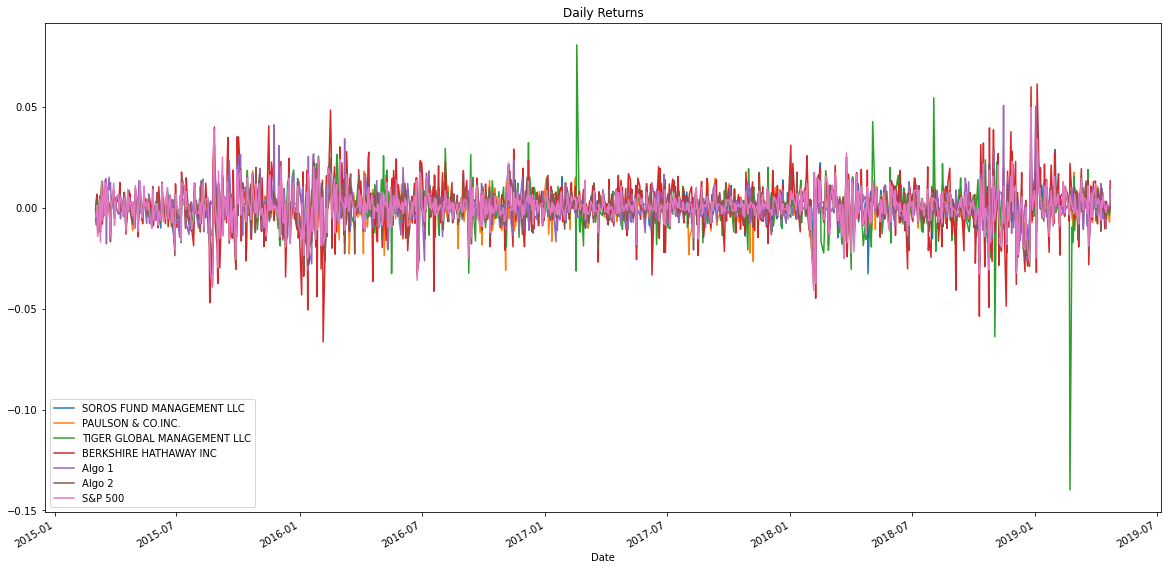

In [289]:
# Plot daily returns
combined_df.plot(figsize=(20,10), title="Daily Returns")

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

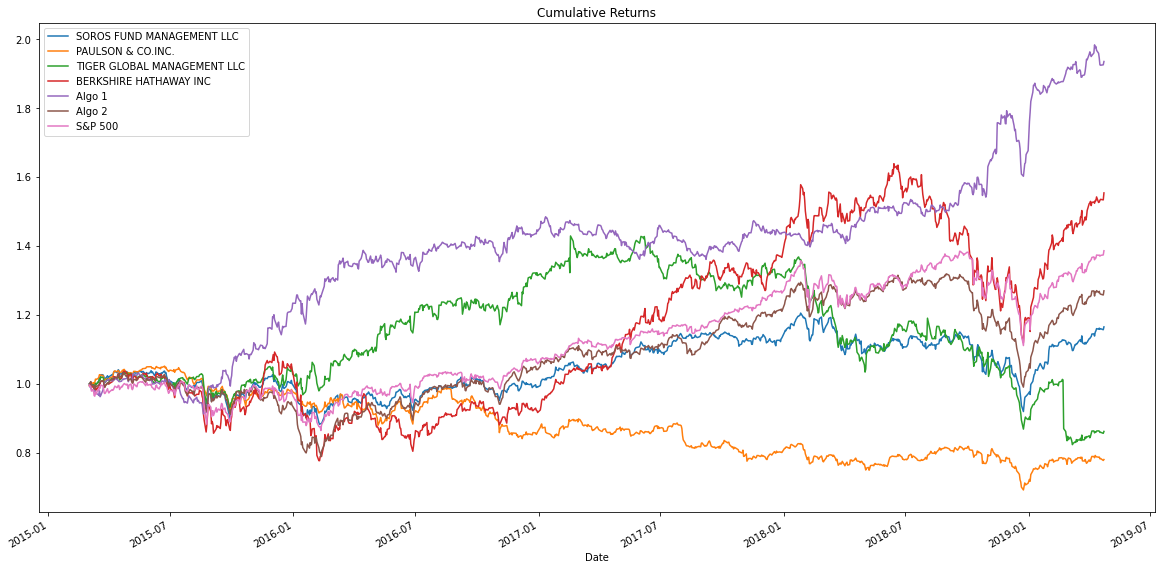

In [290]:
# Plot cumulative returns
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns") 

In [291]:
#Algo 1 outperformed the S&P 500 throughout most all of the data set.  
#Berkshire Hathaway started to outperform the S&P 500 more consistently around July 2017.
#Berkshire Hathaway seems to follow the S&P 500 more closely over the data set vs. Algo 1. 

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<AxesSubplot:title={'center':'Portfolio Risk'}>

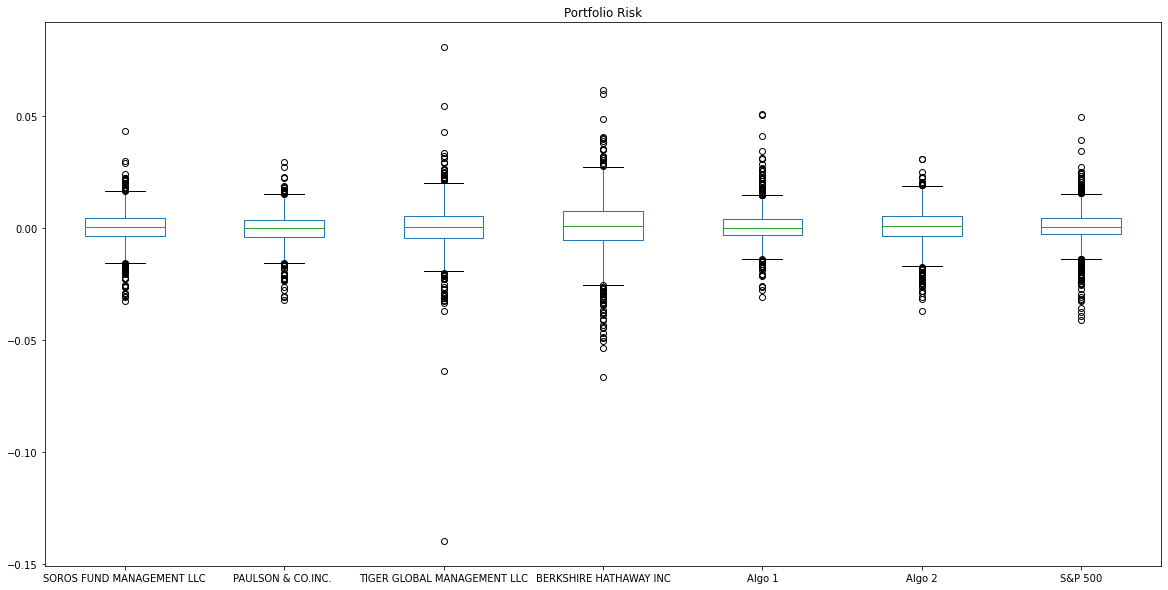

In [292]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(20,10), title="Portfolio Risk") 

In [293]:
#Tiger Global Management LLC has the largest spread, followed by Berkshire Hathaway. 
#Paulon & Co. seems to have the smallest spread based on the box plot.  
#Algo 2 has a similar small spread to Paulson & Co. 
#Tiger Global Management LLC did show the largest return at one point in time, 
#but also showed the largest loss.

In [294]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
daily_std = combined_df.std().sort_values()
daily_std

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [295]:
#Based on standard deviations, Tiger Global Management LLC and Berkshire Hathaway are riskier 
#than the S&P 500 - both have higher standard deviations.

In [296]:
# Determine which portfolios are riskier than the S&P 500
bool_data = daily_std > daily_std["S&P 500"]
bool_data

PAULSON & CO.INC.              False
Algo 1                         False
SOROS FUND MANAGEMENT LLC      False
Algo 2                         False
S&P 500                        False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

In [297]:
#When using a boolean tactic, Tiger Global & Berkshire Hathaway are shown to have greater risk 
#than the S&P 500. This is shown from the code above, which identifies portfolios with a standard
#deviation greater than the S&P 500.

In [298]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = daily_std * np.sqrt(252)
annual_std.sort_values()

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

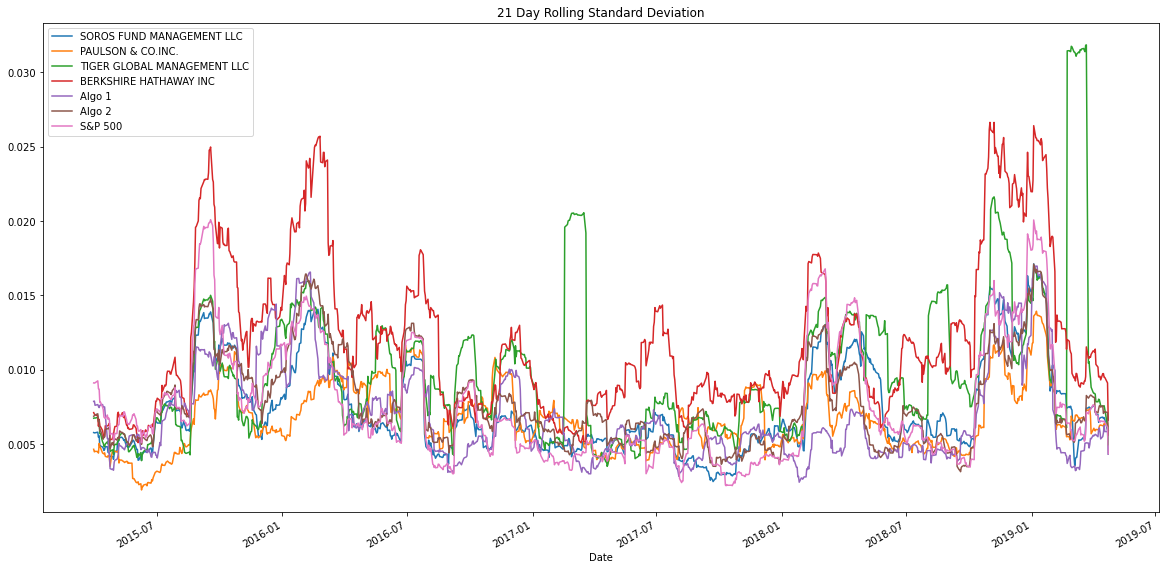

In [299]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_df.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")

In [300]:
#Most porfolios increase in risk at the same time as the S&P 500.  
#Tiger Global's risk spikes at different times vs. the S&P 500. 
#Berkshire Hathaway mostly follows the S&P 500, but has greater spikes at times. 

In [301]:
# Construct a correlation table
correlation_table = combined_df.corr()
correlation_table

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [302]:
#Soros Fund Management and Algo 2 correlate the most with the S&P 500.  
#Berkshire Hathaway correlates well also, at ~75% correlation. 

<AxesSubplot:title={'center':'Rolling 30 Day Beta of Algo 2'}, xlabel='Date'>

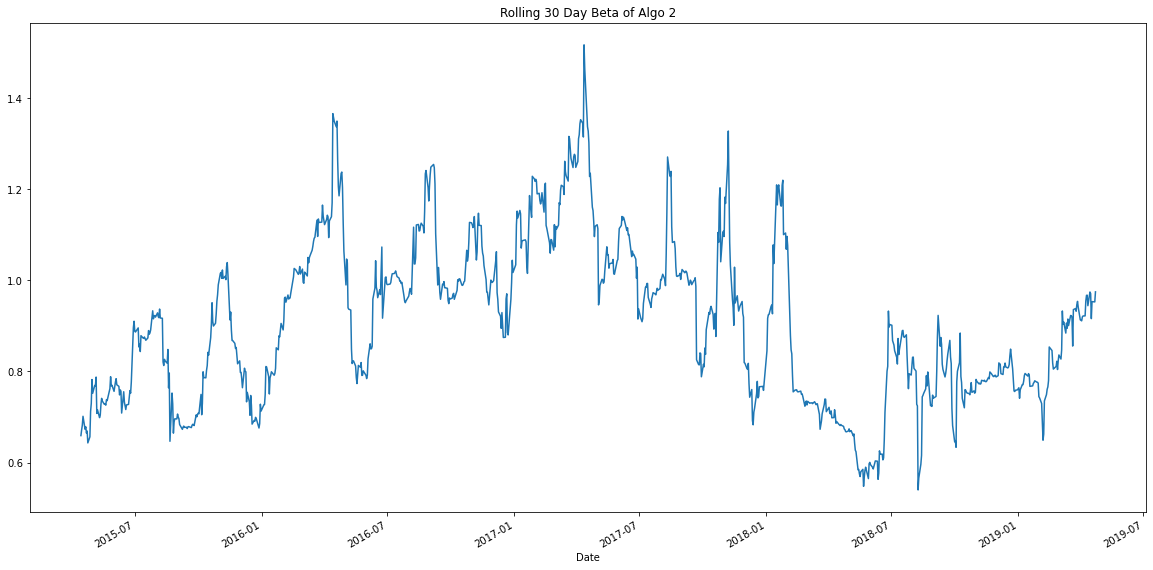

In [303]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
covariance = combined_df["Algo 2"].cov(combined_df["S&P 500"])
#covariance
variance = combined_df["S&P 500"].var()
#variance
beta = covariance / variance
#beta
rolling_covariance = combined_df["Algo 2"].rolling(window=30).cov(combined_df["S&P 500"])
rolling_variance = combined_df["S&P 500"].rolling(window=30).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20,10), title="Rolling 30 Day Beta of Algo 2")

In [304]:
#Based on the beta graph, Algo 2 is fairly sensitive to movements in the S&P 500.
#Algo 2 often seems to move with the S&P 500, but some regular
#spikes above 1 show higher volitility/sensitivity vs. the S&P 500. 

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

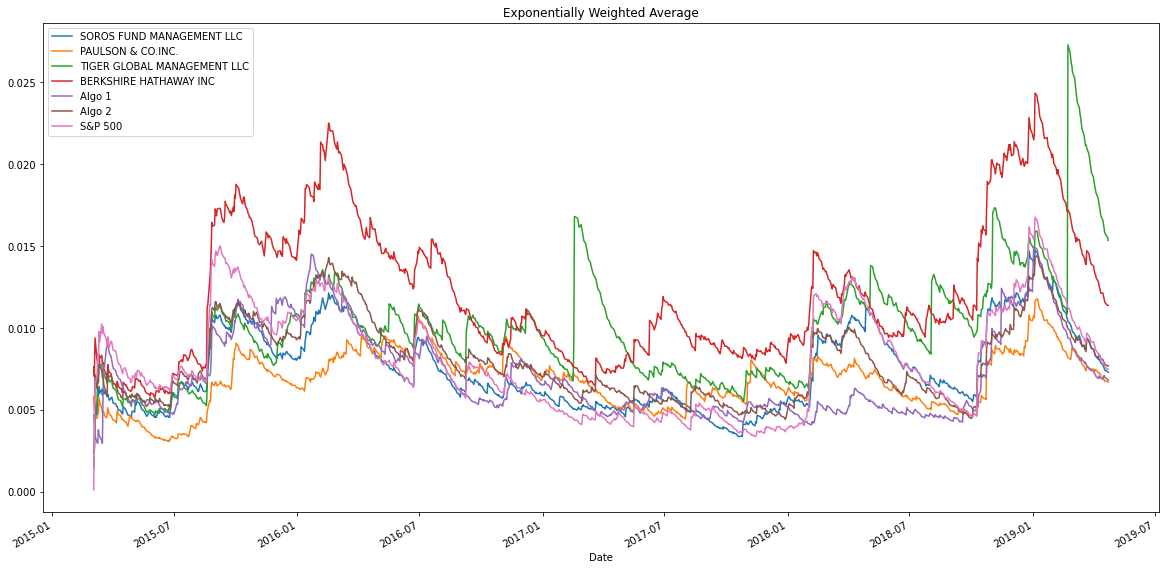

In [305]:
# Calculate a rolling window using the exponentially weighted moving average. 
exp_weighted_average = combined_df.ewm(halflife=21)
exp_weighted_average.std().plot(figsize=(20,10), title="Exponentially Weighted Average")

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [306]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = combined_df.mean() * 252 / annual_std
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P 500                        0.648267
Algo 1                         1.378648
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

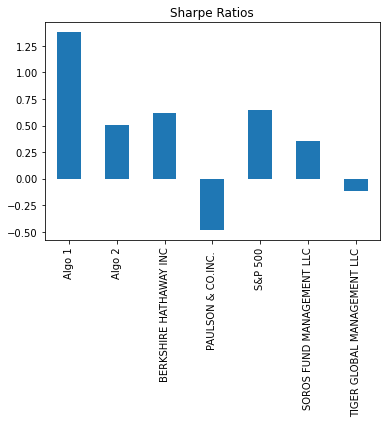

In [307]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

In [308]:
#Algo 1 outperforms the S&P 500 and whale portfolios.  
#Algo 2 performs in a similar manner to the S&P 500, but has a slightly smaller Sharpe Ratio. 
#Algo 2 outperforms all whale portfolios except Berkshire Hathaway. 

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [309]:
amazon_csv = Path("Resources/AMZN_data.csv")
crm_csv = Path("Resources/CRM_data.csv")
jnj_csv = Path("Resources/JNJ_data.csv")

In [310]:
# Read the first stock
amazon_df = pd.read_csv(amazon_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
amazon_df.sort_index(inplace=True)
amazon_df.head()

,Close
Date,
2015-01-02,308.52
2015-01-05,302.19
2015-01-06,295.29
2015-01-07,298.42
2015-01-08,300.46


In [311]:
amazon_df.rename(columns={"Close":"AMZN"}, inplace=True)
amazon_df.head()

,AMZN
Date,
2015-01-02,308.52
2015-01-05,302.19
2015-01-06,295.29
2015-01-07,298.42
2015-01-08,300.46


In [312]:
# Read the second stock
crm_df = pd.read_csv(crm_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
crm_df.sort_index(inplace=True)
crm_df.head()

,Close
Date,
2015-01-02,59.24
2015-01-05,58.17
2015-01-06,57.20
2015-01-07,56.93
2015-01-08,58.59


In [313]:
crm_df.rename(columns={"Close":"CRM"}, inplace=True)
crm_df.head()

,CRM
Date,
2015-01-02,59.24
2015-01-05,58.17
2015-01-06,57.20
2015-01-07,56.93
2015-01-08,58.59


In [314]:
# Read the third stock
jnj_df = pd.read_csv(jnj_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
jnj_df.sort_index(inplace=True)
jnj_df.head()

,Close
Date,
2015-01-02,104.52
2015-01-05,103.79
2015-01-06,103.28
2015-01-07,105.56
2015-01-08,106.39


In [315]:
jnj_df.rename(columns={"Close":"JNJ"}, inplace=True)
jnj_df.head()

,JNJ
Date,
2015-01-02,104.52
2015-01-05,103.79
2015-01-06,103.28
2015-01-07,105.56
2015-01-08,106.39


In [316]:
# Concatenate all stocks into a single DataFrame
combined_stocks = pd.concat([amazon_df, crm_df, jnj_df], axis="columns", join="inner")
combined_stocks.sort_index(inplace=True)
combined_stocks.head()

,AMZN,CRM,JNJ
Date,,,
2015-01-02,308.52,59.24,104.52
2015-01-05,302.19,58.17,103.79
2015-01-06,295.29,57.20,103.28
2015-01-07,298.42,56.93,105.56
2015-01-08,300.46,58.59,106.39


In [317]:
# Reset the index
#Skipped, since seemingly no need due to the way my code was already written.

In [318]:
# Pivot so that each column of prices represents a unique symbol
#Skipped, since seemingly no need due to the way my code was already written.

In [319]:
# Drop Nulls
combined_stocks.dropna()
combined_stocks.isnull().sum()

AMZN    0
CRM     0
JNJ     0
dtype: int64

In [320]:
daily_stock_change = combined_stocks.pct_change().dropna()
daily_stock_change.isnull().sum()
daily_stock_change.head()

,AMZN,CRM,JNJ
Date,,,
2015-01-05,-0.020517,-0.018062,-0.006984
2015-01-06,-0.022833,-0.016675,-0.004914
2015-01-07,0.010600,-0.004720,0.022076
2015-01-08,0.006836,0.029159,0.007863
2015-01-09,-0.011749,-0.007339,-0.013629


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [321]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
weighted_returns = daily_stock_change.dot(weights)
weighted_returns.head()

Date
2015-01-05   -0.015188
2015-01-06   -0.014807
2015-01-07    0.009318
2015-01-08    0.014619
2015-01-09   -0.010906
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [322]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
final_combined_df = pd.concat([combined_df, weighted_returns], axis="columns", join="inner")
final_combined_df.rename(columns={0:"Custom"}, inplace=True)
final_combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.011102
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.014192
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.010951
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.019723
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.005240


In [323]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
final_combined_df.dropna()
final_combined_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Custom                         0
dtype: int64

<AxesSubplot:title={'center':'Daily Returns with Custom Portfolio'}, xlabel='Date'>

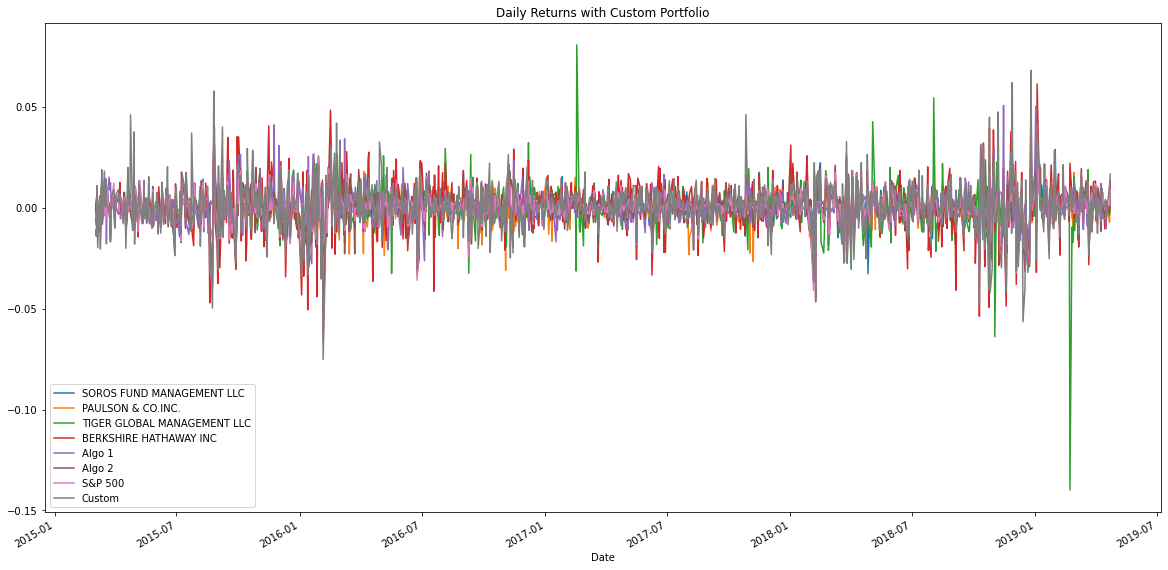

In [324]:
final_combined_df.plot(figsize=(20,10), title="Daily Returns with Custom Portfolio")

<AxesSubplot:title={'center':'Cumulative Returns with Custom Portfolio'}, xlabel='Date'>

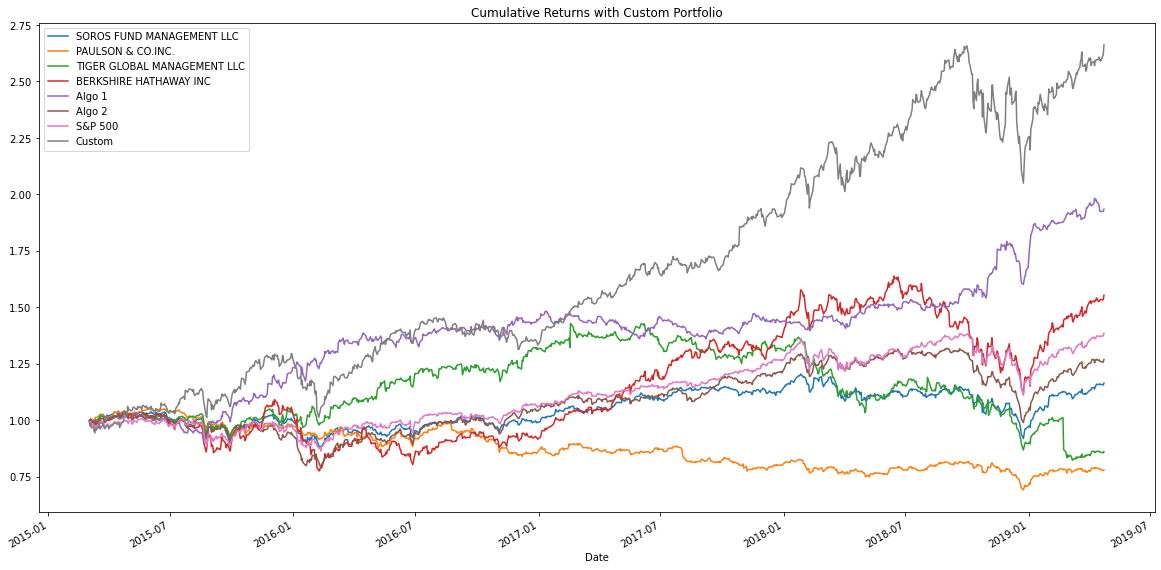

In [325]:
final_cumulative_returns = (1 + final_combined_df).cumprod()
final_cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns with Custom Portfolio")

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [326]:
# Risk
final_daily_std = final_combined_df.std().sort_values()
final_daily_std

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
Custom                         0.012401
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [327]:
#My custom portfolio has a daily standard deviation similar to Berkshire Hathaway.
#Based on daily standard deviation, my custom portfolio is riskier
#than all others, aside for Berkshire Hathaway. 

<AxesSubplot:title={'center':'Portfolio Risk with Custom Portfolio'}>

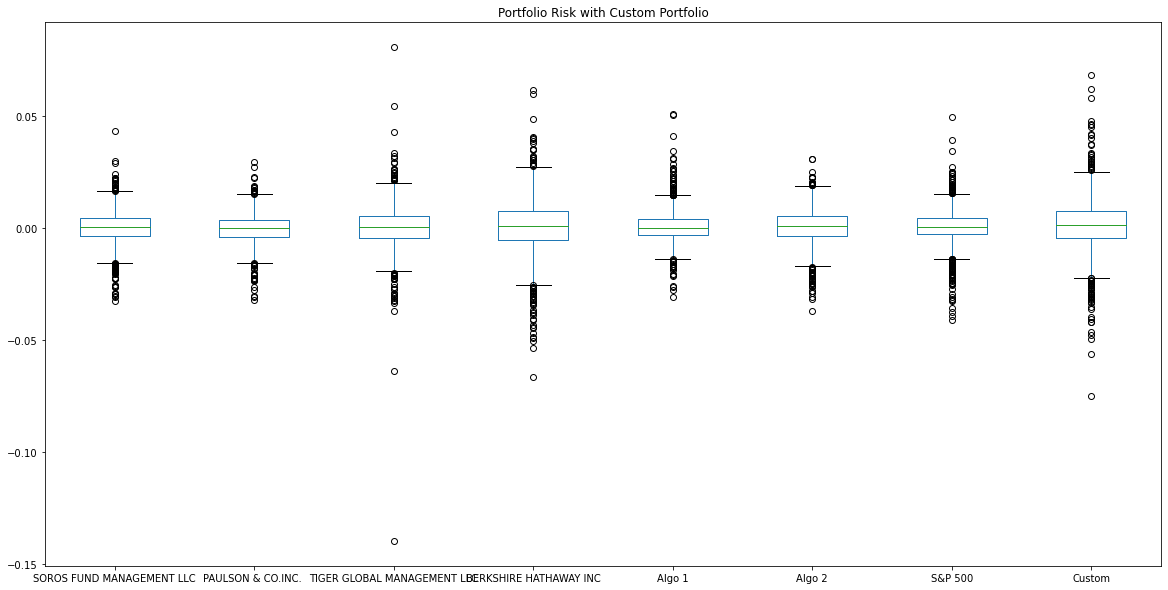

In [328]:
final_combined_df.plot.box(figsize=(20,10), title="Portfolio Risk with Custom Portfolio")

In [329]:
#My custom portfolio has a spread greater than nearly all other portfolios.  
#Berkshire Hathaway and my custom portfolio have very similar spreads. 
#Tiger Global has the greatest spread of all portfolios. 

In [330]:
final_annual_std = final_daily_std * np.sqrt(252)
final_annual_std.sort_values()

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
Custom                         0.196867
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

In [331]:
#Just like with daily standard deviation, my custom portfolio is riskier than all
#portfolios, except for Berkshire Hathaway.

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation with Custom Portfolio'}, xlabel='Date'>

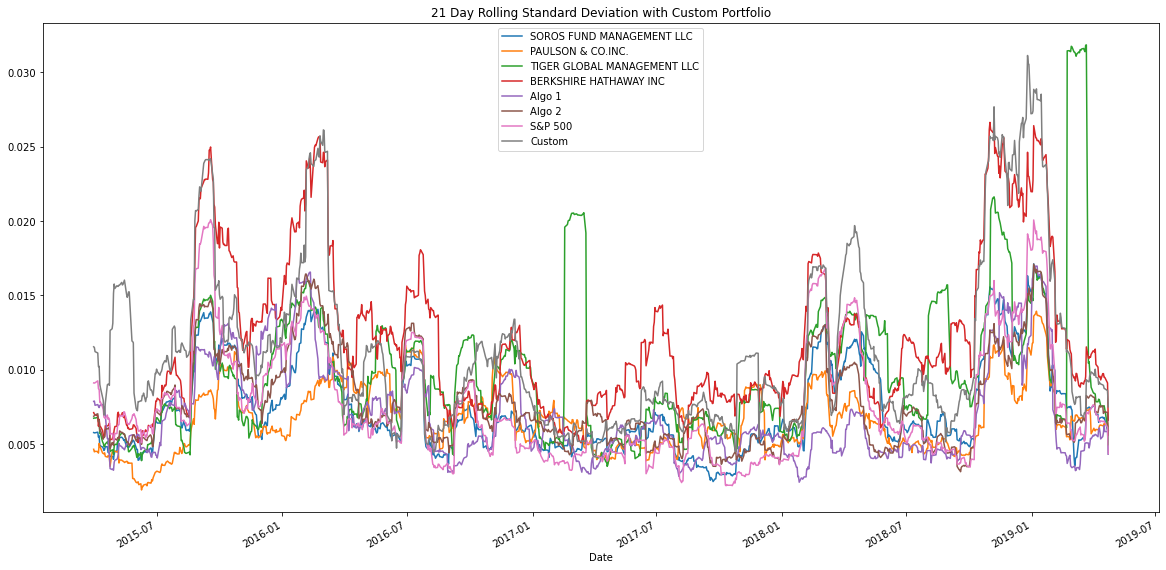

In [332]:
# Rolling
final_combined_df.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling Standard Deviation with Custom Portfolio")

In [333]:
#Risk for my custom portfolio tends to be higher than the S&P 500.  
#However, movement does seem to be similar to the S&P 500, just at more of an extreme. 
#My custom portfolio follows spikes similar to Berkshire Hathaway. 

In [334]:
# Annualized Sharpe Ratios
final_sharpe_ratios = final_combined_df.mean() * 252 / final_annual_std
final_sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P 500                        0.648267
Custom                         1.300644
Algo 1                         1.378648
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

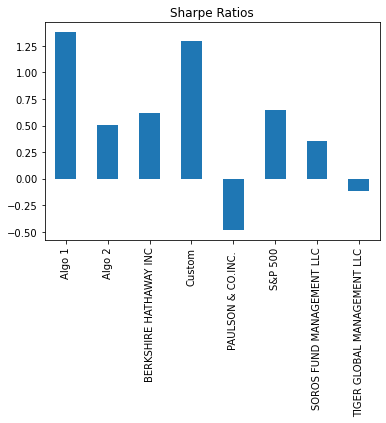

In [335]:
# Visualize the sharpe ratios as a bar plot
final_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [336]:
#My custom portfolio has one of the better Sharpe ratios, at 1.30.  
#My custom portfolio outperforms all other portfolios based on Sharpe Ratio, except for Algo 1. 

In [337]:
# Create a correlation analysis
final_correlation_table = final_combined_df.corr()
final_correlation_table

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864,0.671170
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732,0.522308
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946,0.478666
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371,0.706370
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494,0.246609
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764,0.634747
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000,0.788921
Custom,0.671170,0.522308,0.478666,0.706370,0.246609,0.634747,0.788921,1.000000


In [338]:
#My custom portfolio correlates the most with the S&P 500, with ~79% correlation. 
#Berkshire Hathaway and my custom portfolio also have a decent correlation at ~71%. 

<AxesSubplot:>

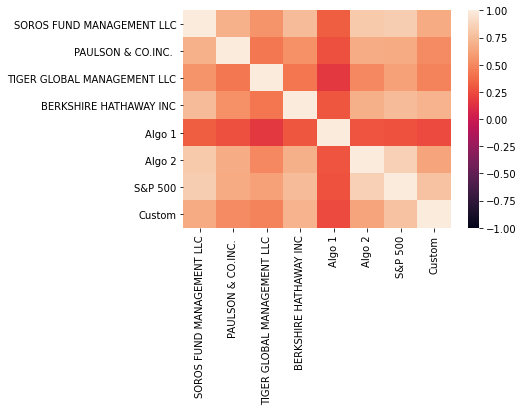

In [339]:
heat_map = sns.heatmap(final_correlation_table, vmin=-1, vmax=1)
heat_map

<AxesSubplot:title={'center':'Rolling 30 Day Beta of Custom Portfolio'}, xlabel='Date'>

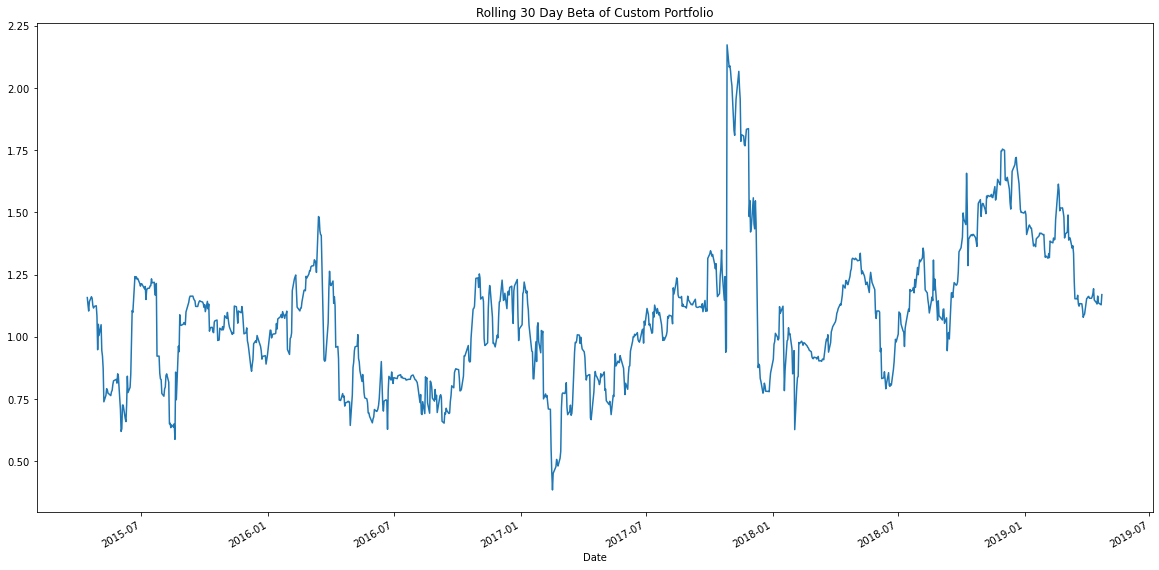

In [340]:
# Beta
final_covariance = final_combined_df["Custom"].cov(final_combined_df["S&P 500"])
final_covariance
final_variance = final_combined_df["S&P 500"].var()
final_variance
final_beta = final_covariance / final_variance
final_beta
final_rolling_covariance = final_combined_df["Custom"].rolling(window=30).cov(final_combined_df["S&P 500"])
final_rolling_variance = final_combined_df["S&P 500"].rolling(window=30).var()
final_rolling_beta = final_rolling_covariance / final_rolling_variance
final_rolling_beta.plot(figsize=(20,10), title="Rolling 30 Day Beta of Custom Portfolio")

In [341]:
#My custom portfolio is sensitive to the S&P 500, but not as much as some of the other portfolios. 
#My custom portfolio does correlate fairly well with the S&P 500, however, it is more volitile and spends a decent 
#amount of time above 1, with spike reaching almost 2.25.  Additionally and dips reaching just below .50. 

<AxesSubplot:title={'center':'Exponentially Weighted Average with Custom Portfolio'}, xlabel='Date'>

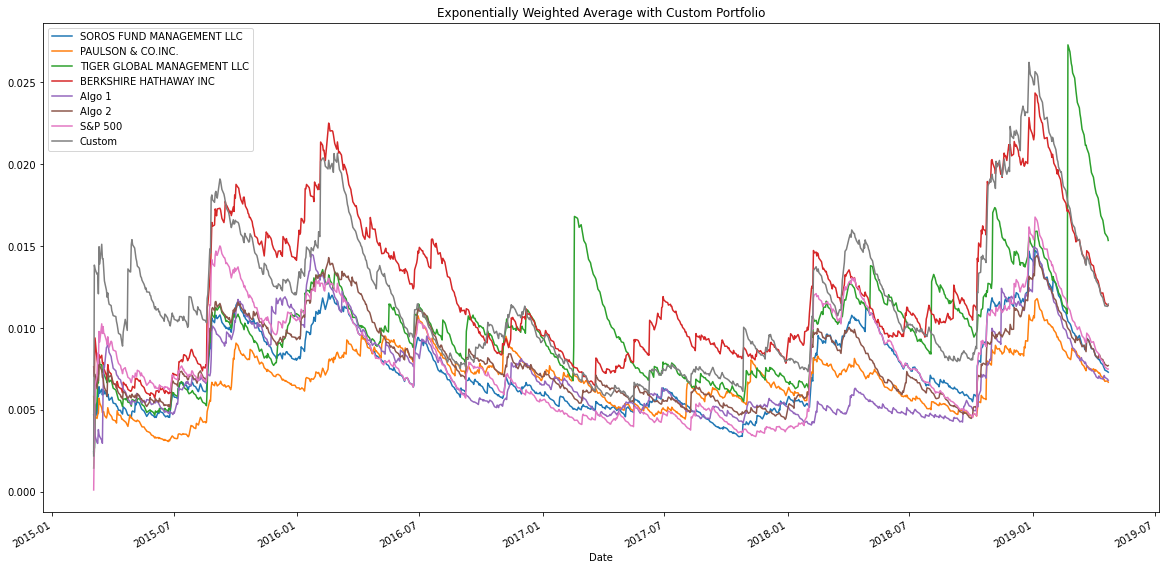

In [342]:
final_exp_weighted_average = final_combined_df.ewm(halflife=21)
final_exp_weighted_average.std().plot(figsize=(20,10), title="Exponentially Weighted Average with Custom Portfolio")